# Olivetti Faces Classifier Trial

## Imports

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay,f1_score
from mltoolkit.preprocessing import TransformerWrapper
from mltoolkit.utils import dump_model
from mltoolkit.model_selection import test_water,measure_classifier

## Functions

In [38]:
def measure_classifier(estimator,trainortest:str,y_true,y_pred,labels=None,average='binary') -> dict:
    '''
    Quickly measure the performance of an estimator using common scoring method
    for classification.
    
    Parameters:
    ----------
    estimator: Estimator object
        Mainly for the use of extracting the name and labeling the output dict.
    trainortest: str
        To label the results as train or test measurement.
    y_true: 1D-ndarray
        True labels.
    y_pred: 1D-ndarray
        Predicted labels.
    
    Returns:
    ----------
    dict: Dictionary
    '''
    acc = accuracy_score(y_true,y_pred)
    prec = precision_score(y_true,y_pred,average=average)
    rec = recall_score(y_true,y_pred,average=average)
    f1 = f1_score(y_true,y_pred,average=average)
    
    name = str(estimator)
    # [:str(estimator).find('(')]
    print("Estimator:",name)
    print("Train/Test:",trainortest.title())
    print("Accuracy:",acc)
    print("Precision:",prec)
    print("Recall:",rec) 
    print("F1:",f1)
    row_num = min((np.unique(y_true).size,9))
    f = plt.figure(figsize=(row_num*2,row_num*2))
    ax = f.gca()
    cmdisp = ConfusionMatrixDisplay.from_predictions(y_true,y_pred,
                                                     display_labels=labels if labels is not None else np.unique(y_true),
                                                     cmap='Greys',ax=ax)
    plt.show()
    results = {
        "Estimator":name,
        "Train/Test":trainortest.title(),
        "Accuracy":acc,
        "Precision":prec,
        "Recall":rec,
        "F1":f1,
        "Confusion Matrix":cmdisp
    }
    return results

## Loading the datasets

In [4]:
X_train = pd.read_csv("Datasets/X_train.csv",index_col=0)
y_train = pd.read_csv("Datasets/y_train.csv",index_col=0)
X_test = pd.read_csv("Datasets/X_test.csv",index_col=0)
y_test = pd.read_csv("Datasets/y_test.csv",index_col=0)

## Preparing the datasets

In [5]:
pca = PCA(n_components=260)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [6]:
X_train_pca.shape,X_test_pca.shape

((320, 260), (80, 260))

In [43]:
np.savetxt("Datasets\\X_test_pca.csv",X_test_pca,delimiter=',',encoding='utf-8')

## Finding Best Model

We will first try with various classification models and see which one is the best fit without hyperparameters tuning.

In [41]:
models_to_test = [
    GradientBoostingClassifier,
    RandomForestClassifier,
    RidgeClassifier,
    SGDClassifier,
    KNeighborsClassifier,
    SVC,
    DecisionTreeClassifier
]

In [10]:
models_test_result = test_water(models_to_test,X_train_pca,y_train,cv=5,n_jobs=4)
models_test_result

,run,estimator,fit_time,score_time,test_score
0,0,GradientBoostingClassifier,68.103444,0.000000,0.281250
1,1,GradientBoostingClassifier,68.350525,0.015628,0.312500
2,2,GradientBoostingClassifier,68.848676,0.000000,0.312500
3,3,GradientBoostingClassifier,67.165541,0.000000,0.328125
4,4,GradientBoostingClassifier,51.142559,0.000000,0.406250
5,0,RandomForestClassifier,0.500138,0.015630,0.812500
6,1,RandomForestClassifier,0.578285,0.015631,0.765625
7,2,RandomForestClassifier,0.578285,0.015631,0.812500
8,3,RandomForestClassifier,0.578285,0.015631,0.796875
9,4,RandomForestClassifier,0.492342,0.015632,0.781250


In [11]:
models_test_result.groupby('estimator').mean()

,run,fit_time,score_time,test_score
estimator,,,,
DecisionTreeClassifier,2.0,0.103154,0.000000,0.437500
GradientBoostingClassifier,2.0,64.722149,0.003126,0.328125
KNeighborsClassifier,2.0,0.003126,0.096905,0.753125
RandomForestClassifier,2.0,0.564980,0.012504,0.785937
RidgeClassifier,2.0,0.003124,0.006247,0.928125
SGDClassifier,2.0,0.043764,0.000000,0.900000
SVC,2.0,0.028136,0.009377,0.918750


Ridge Classifier, SGD Classifier and SVC have quite good performance.

We will use Ridge Classifier as it has the highest accuracy score with its default configuration.

## Ridge Classifier Grid Search

We will perform a grid search to find the best hyperparameters for the ridge classifier to see how much we can push further with this model.

In [18]:
param_grid = {
    "alpha":np.logspace(-3,5,num=9)
}

In [24]:
ridge_0_gs = GridSearchCV(RidgeClassifier(),param_grid,scoring='accuracy',cv=5,n_jobs=4)
ridge_0_gs.fit(X_train_pca,np.ravel(y_train))

GridSearchCV(cv=5, estimator=RidgeClassifier(), n_jobs=4,
             param_grid={'alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])},
             scoring='accuracy')

In [26]:
ridge_0_gs_cv_results = pd.DataFrame(ridge_0_gs.cv_results_)
ridge_0_gs_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013999,0.002967,0.002401,0.001745,0.001,{'alpha': 0.001},0.375000,0.437500,0.453125,0.312500,0.406250,0.396875,0.050000,8
1,0.009200,0.001720,0.000599,0.000489,0.01,{'alpha': 0.01},0.515625,0.562500,0.531250,0.437500,0.484375,0.506250,0.042619,7
2,0.009001,0.000632,0.000400,0.000490,0.1,{'alpha': 0.1},0.734375,0.812500,0.843750,0.781250,0.750000,0.784375,0.040020,5
3,0.005233,0.003538,0.000000,0.000000,1.0,{'alpha': 1.0},0.937500,0.968750,0.968750,0.875000,0.890625,0.928125,0.039031,3
4,0.007884,0.006525,0.000000,0.000000,10.0,{'alpha': 10.0},0.953125,0.984375,0.984375,0.906250,0.953125,0.956250,0.028641,1
5,0.006251,0.007656,0.000000,0.000000,100.0,{'alpha': 100.0},0.921875,0.984375,0.953125,0.906250,0.953125,0.943750,0.027243,2
6,0.006252,0.007657,0.000000,0.000000,1000.0,{'alpha': 1000.0},0.843750,0.828125,0.843750,0.875000,0.875000,0.853125,0.018750,4
7,0.009378,0.007657,0.000000,0.000000,10000.0,{'alpha': 10000.0},0.625000,0.546875,0.562500,0.578125,0.687500,0.600000,0.050967,6
8,0.012504,0.006252,0.000000,0.000000,100000.0,{'alpha': 100000.0},0.234375,0.203125,0.171875,0.171875,0.203125,0.196875,0.023385,9


Ridge Classifier performs the best at alpha = 10.0

## Ridge Classifier (alpha = 10.0)

In [27]:
ridge_0 = ridge_0_gs.best_estimator_
ridge_0

RidgeClassifier(alpha=10.0)

In [28]:
ridge_0_yhat_test = ridge_0.predict(X_test_pca)
ridge_0_yhat_test

array([37, 12, 34, 24,  4, 21, 18, 28, 31, 15, 10, 30, 19, 23, 32,  3, 11,
        3, 34,  2, 36, 31,  5, 32,  9, 25, 39, 23, 30, 16, 29, 16, 35, 13,
       37, 26, 35, 17, 29,  7, 18, 33,  2, 15, 20, 22, 22, 11, 10, 27,  0,
        4, 21, 36, 27,  9, 28,  1, 25, 20,  1,  6,  8, 26, 39,  6,  2, 39,
       14, 38, 24, 13, 19,  8, 33, 14, 12,  5, 17, 38], dtype=int64)

Estimator: RidgeClassifier(alpha=10.0)
Train/Test: Test
Accuracy: 0.975
Precision: 0.9833333333333332
Recall: 0.975
F1: 0.9733333333333334


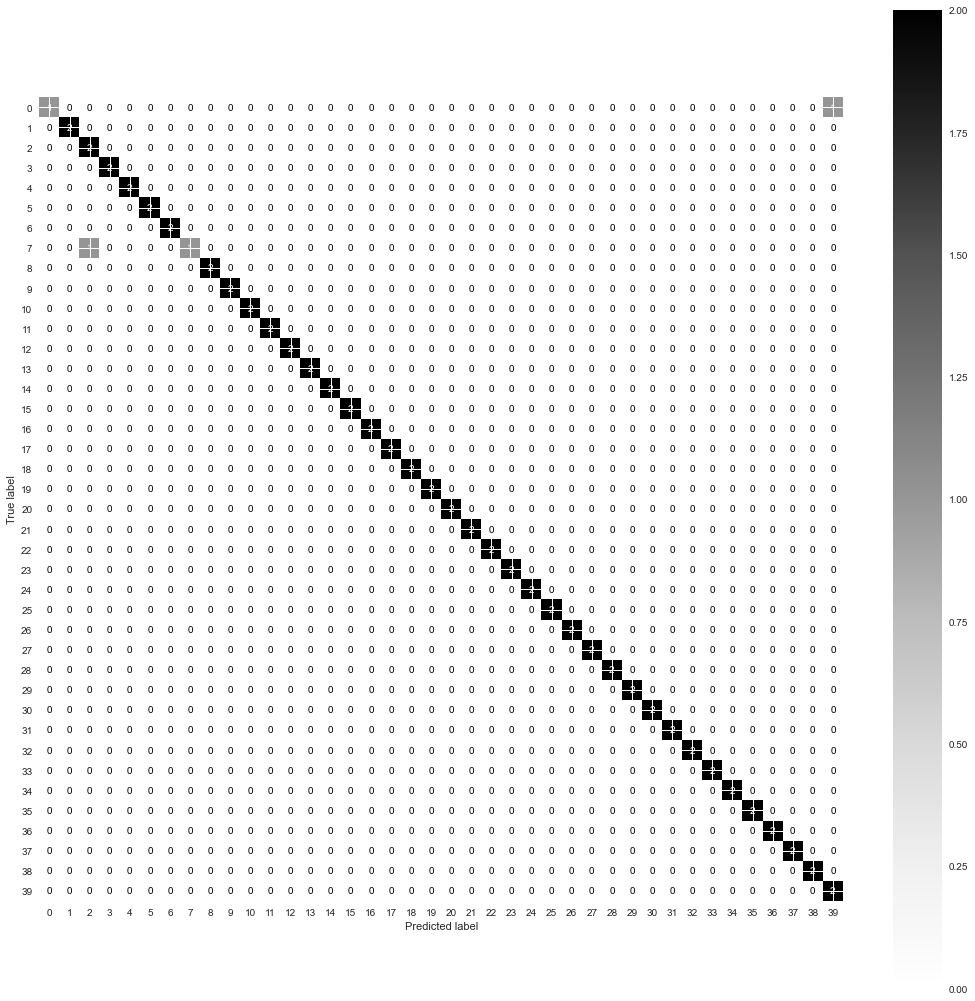

In [40]:
ridge_0_results = measure_classifier(ridge_0,"Test",np.ravel(y_test),ridge_0_yhat_test,average='weighted')

### Saving the model

In [42]:
dump_model(ridge_0,"Trained Models\\ridge_0\\","ridge_0",ridge_0_yhat_test,ridge_0_results)

## Conclusion

There are a few more ways that can possibly improve the performance of the model:
1. Dimensionality reduction with KMeans clustering (distance to cluster center)
2. PCA + KMeans dimensionality reduction
3. Data Augmentation with mirroring faces (left and right mirror)
4. Data Augmentation with Gaussian Mixture Clustering generating new samples

But due to the fact that the model is already good enough (97.5% accuracy at test dataset) that we dont have to further fine tune it at this moment.\
So I will stop exploring the above listed possibilities here.